<a href="https://colab.research.google.com/github/Biswajit7890/ADV-DL-NLP-Notebooks/blob/main/category_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import vaex as pd
import plotly.graph_objects as go
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import string
import nltk 
import string 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
from tqdm import tqdm
from bs4 import BeautifulSoup
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
import textstat
import plotly
import plotly.offline as pyo
#from chart_studio.plotly import plot, iplot
import cufflinks as cf
cf.go_online()
cf.set_config_file(offline=False, world_readable=True)
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


ModuleNotFoundError: ignored

In [ ]:
pip install textstat

     |████████████████████████████████| 101 kB 6.4 MB/s 
     |████████████████████████████████| 2.0 MB 54.1 MB/s 


In [ ]:
df=pd.read_csv('/content/category_class_title_description_lowlevel.csv.csv',sep = ';')

In [ ]:
df.head()

title_norm  ...                                         cat_idealo
0                                          004  ...  Drugstore & Health > Cosmetics & Fragrances > ...
1                                007 for Femme  ...  Drugstore & Health > Cosmetics & Fragrances > ...
2                                  0.15mm C 13  ...  Drugstore & Health > Cosmetics & Fragrances > ...
3                                 01 Day Cream  ...  Drugstore & Health > Body Hygiene & Care > Fac...
4  01 Day Cream SPF 30 - day cream with SPF 30  ...  Drugstore & Health > Body Hygiene & Care > Fac...

[5 rows x 3 columns]

In [ ]:
df.shape

(53560, 3)

In [ ]:
df.nunique()

title_norm          43064
description_norm    46102
cat_idealo             64
dtype: int64

In [ ]:
print(f"how many percentage of data is Null\n\n",(df.isnull().sum()/df.shape[0])*100)

how many percentage of data is Null

 title_norm          0.031740
description_norm    2.326363
cat_idealo          0.000000
dtype: float64


In [ ]:
df=df.drop_duplicates()
df=df.dropna()
df.shape

(52305, 3)

which title is the Most Occupied



Text(0.5, 1.0, 'Figure 3')

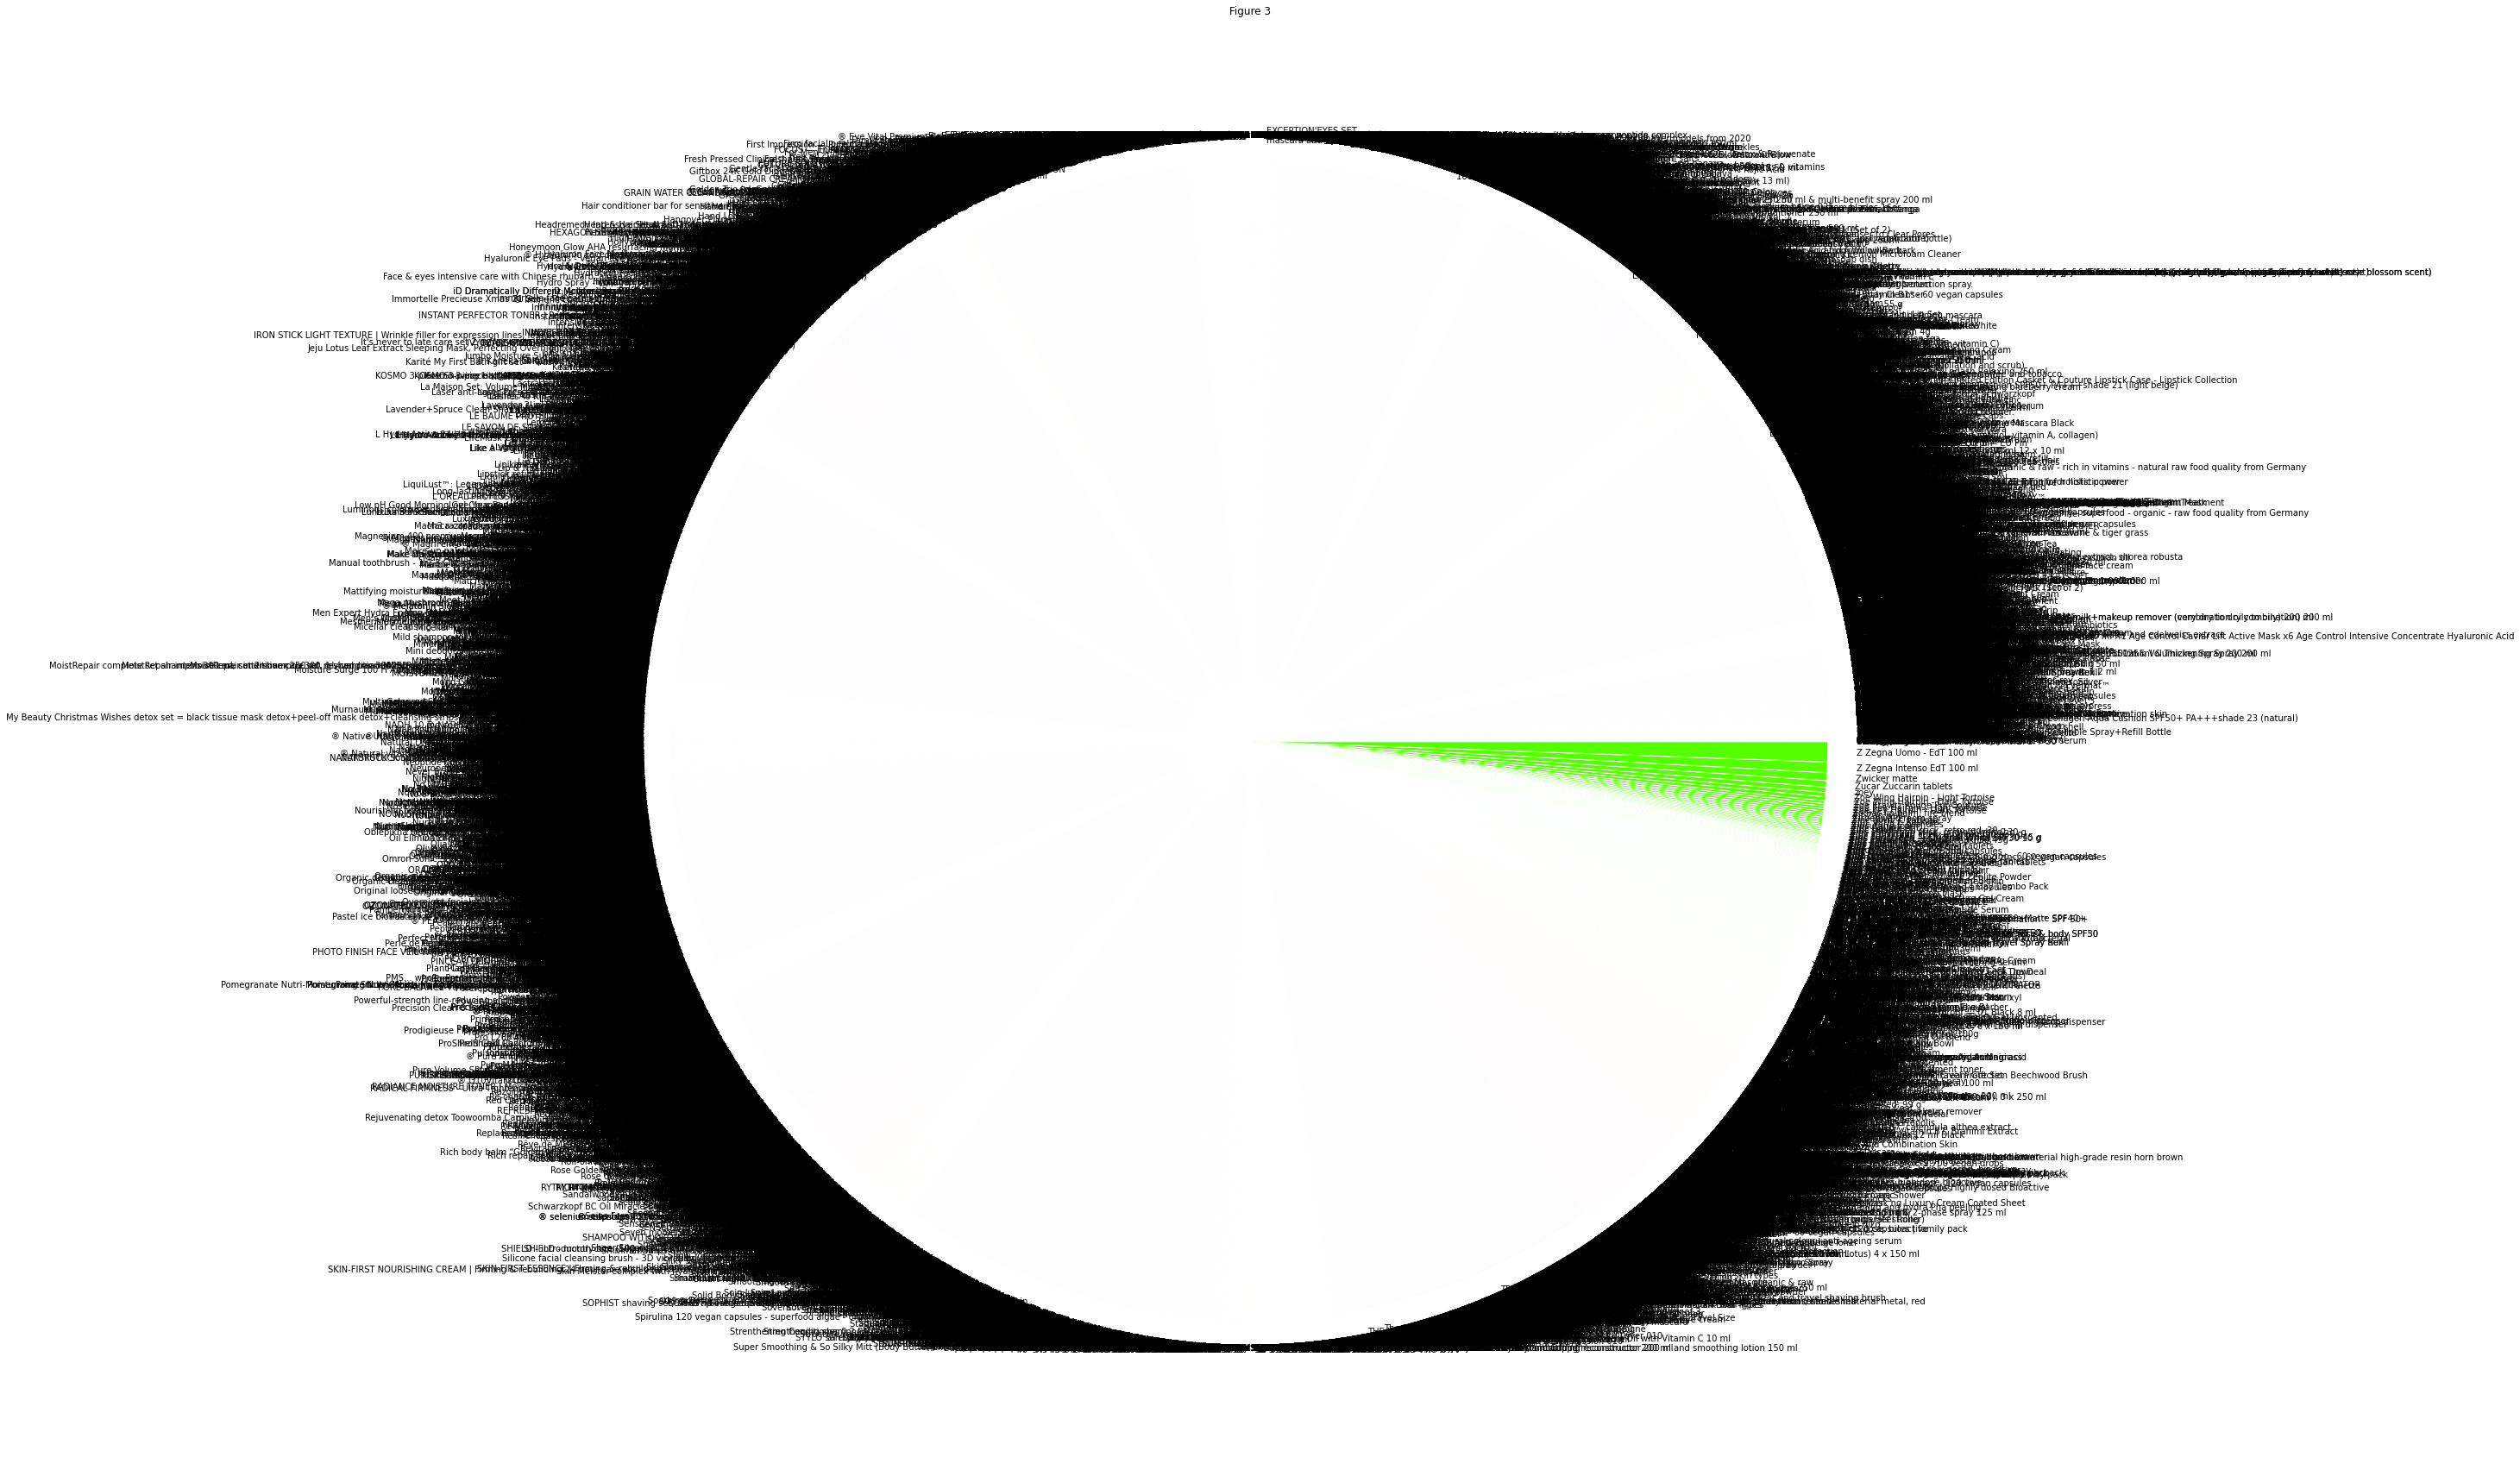

In [ ]:
import random
print("which title is the Most Occupied\n")
title_count=sorted(df['title_norm'].value_counts())
labels=df['title_norm'].unique()
fig = plt.figure(figsize=[30, 50])
ax = fig.add_subplot(111)


cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(title_count)))

pie_wedge_collection = ax.pie(title_count, colors=colors, labels=labels, labeldistance=1.05);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax.set_title("Figure 3")

which category is the Most Occupied



Text(0.5, 1.0, 'Figure 3')

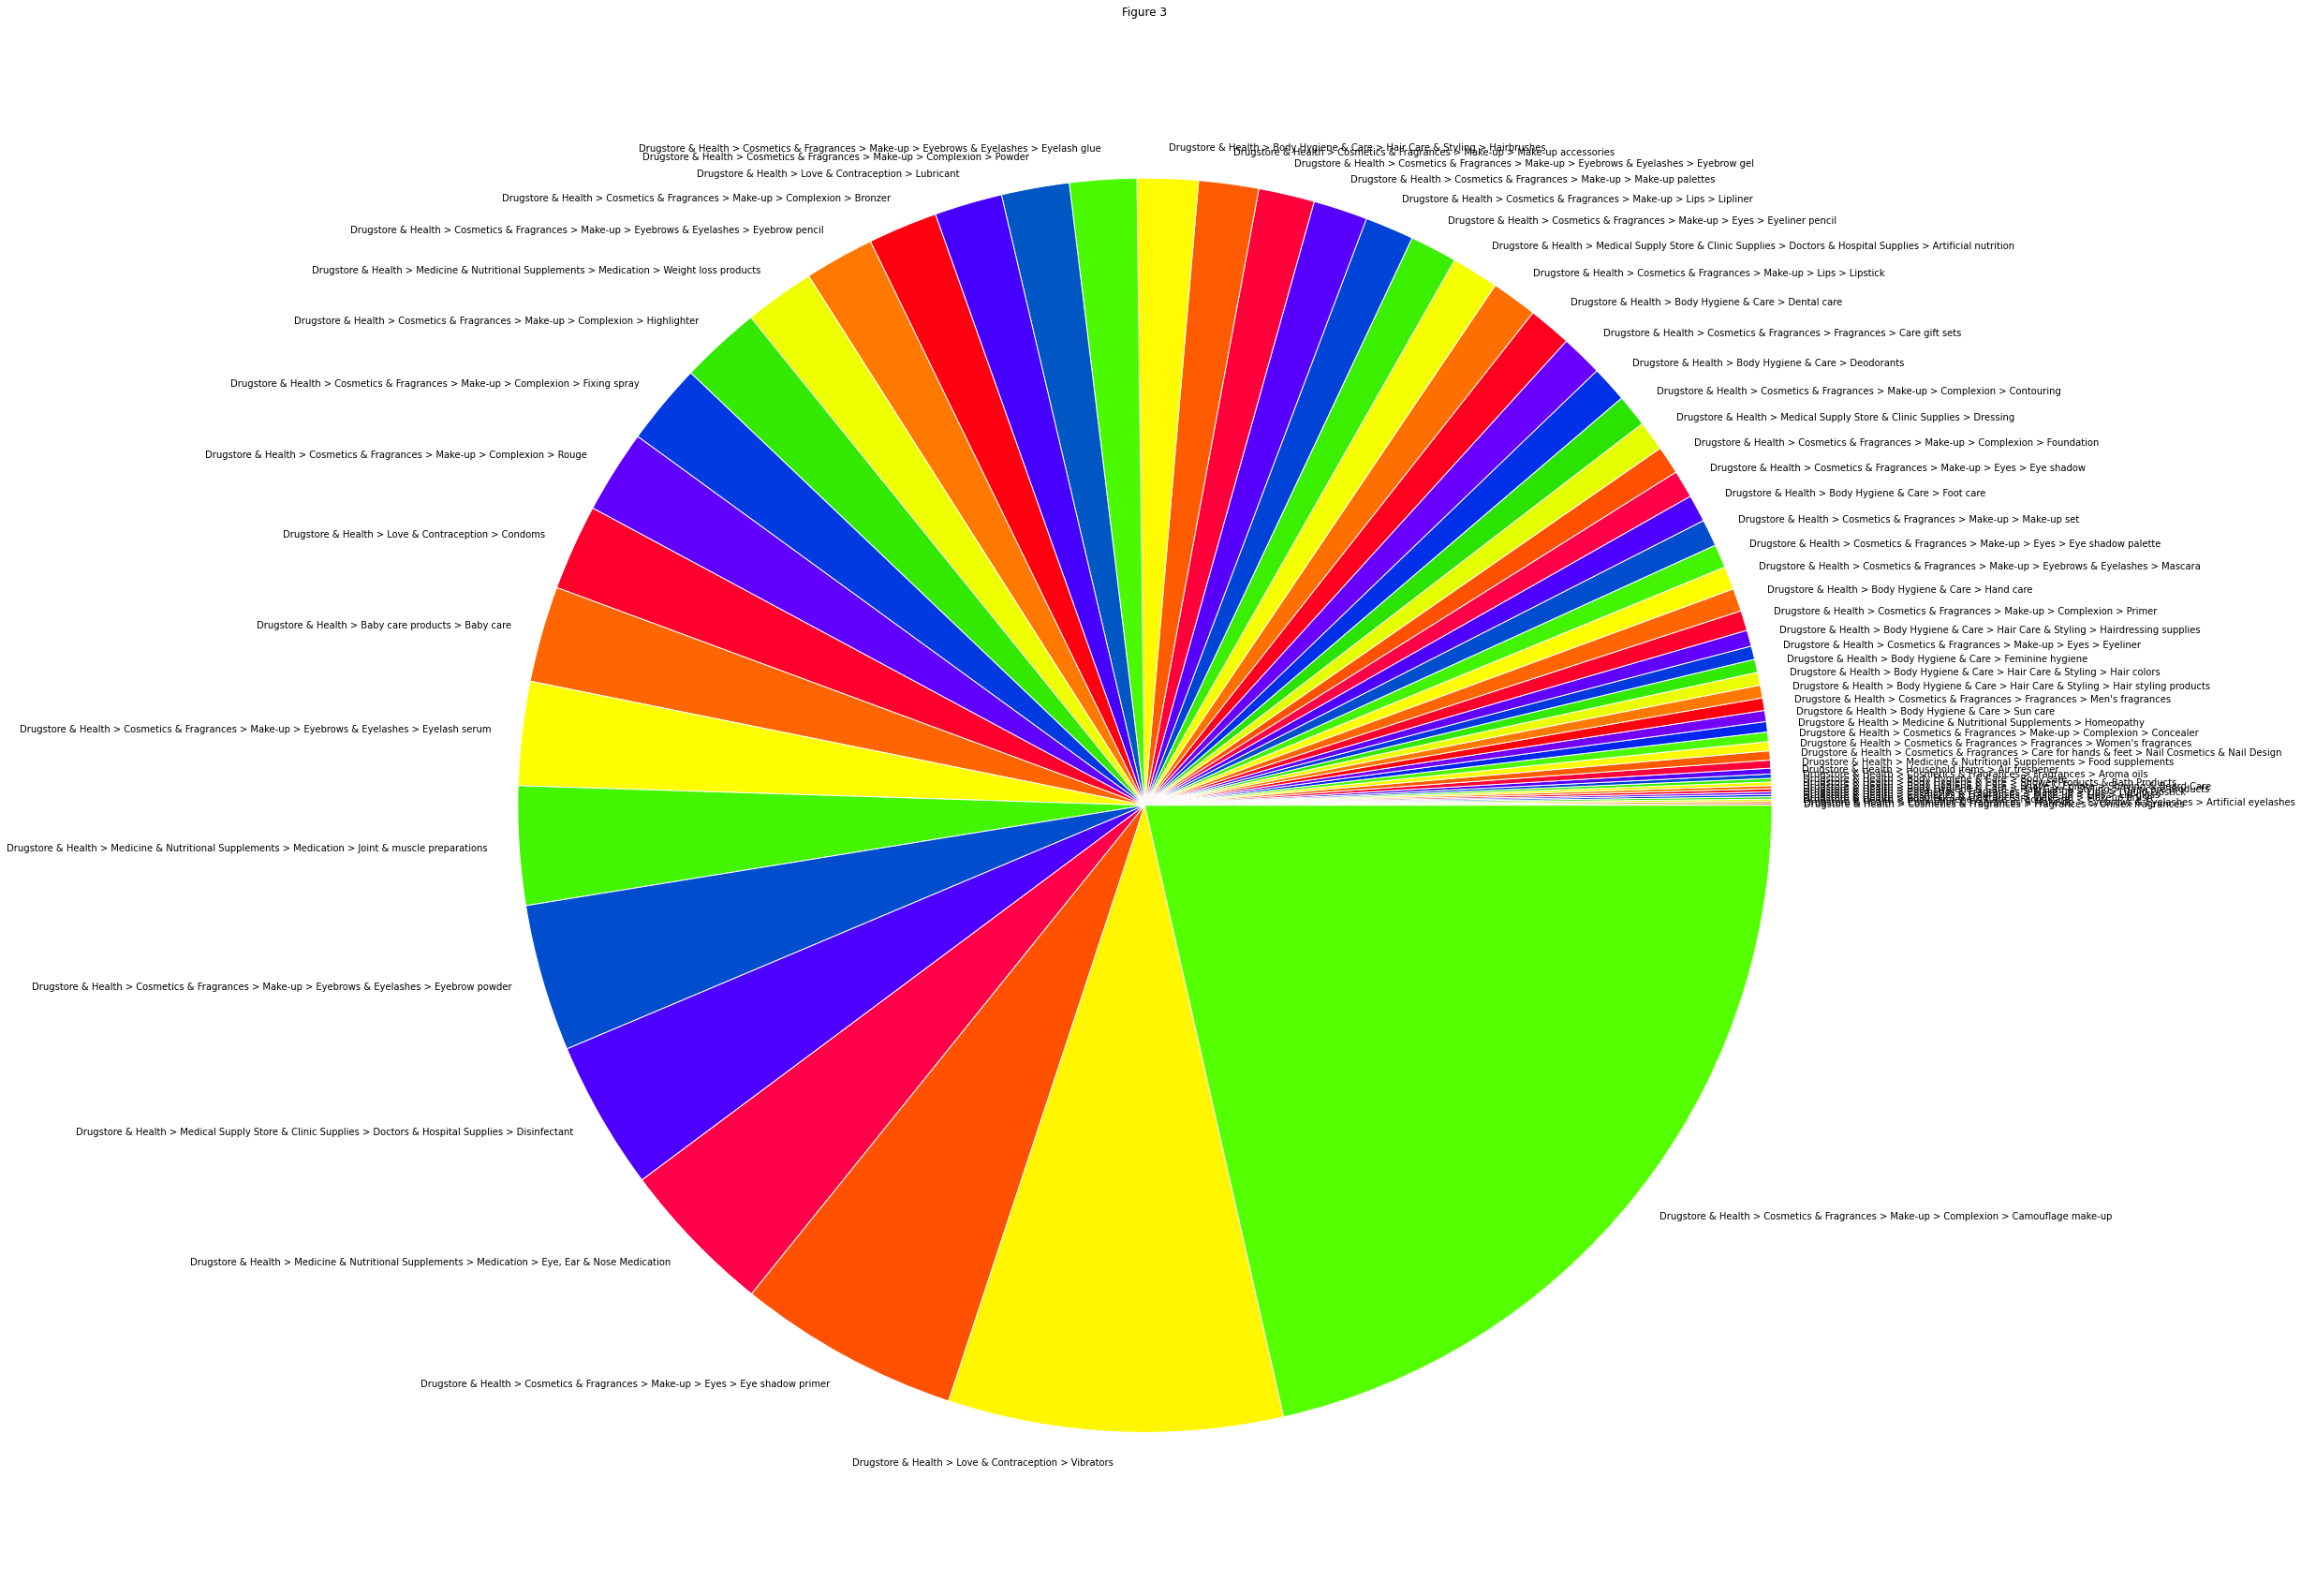

In [ ]:
import random
print("which category is the Most Occupied\n")
title_count=sorted(df['cat_idealo'].value_counts())
labels=df['cat_idealo'].unique()
fig = plt.figure(figsize=[30, 50])
ax = fig.add_subplot(111)


cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(title_count)))

pie_wedge_collection = ax.pie(title_count, colors=colors, labels=labels, labeldistance=1.05);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax.set_title("Figure 3")

 Textstat is typically used for determining readability, complexity, and grade level of a particular corpus. Each of these indices works on a different methodology for determining the readability level of a document.

In [ ]:
df['dale_chall_score']=df['description_norm'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['flesh_reading_ease']=df['description_norm'].apply(lambda x: textstat.flesch_reading_ease(x))
df['gunning_fog']=df['description_norm'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score of description=>',df['dale_chall_score'].mean())
print('Flesch Reading Score of descriptions=>',df['flesh_reading_ease'].mean())
print('Gunning Fog Index of description=>',df['gunning_fog'].mean())


Dale Chall Score of description=> 10.907876302456632
Flesch Reading Score of descriptions=> 48.40129280183548
Gunning Fog Index of description=> 13.790824013000657


The Word Count of  the descriptions in the dataset

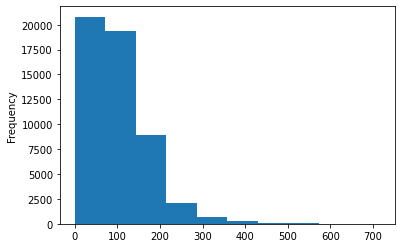

In [ ]:
df['word_count'] = df['description_norm'].apply(lambda x: len(str(x).split()))
df['word_count'].plot(kind='hist')

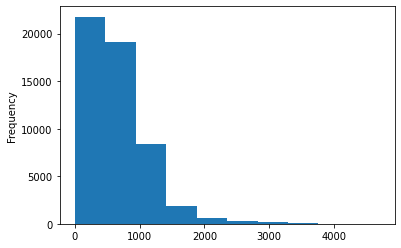

In [ ]:
df['desc_len'] = df['description_norm'].astype(str).apply(len)
df['desc_len'].plot(kind='hist')

In [ ]:
words = df['description_norm']
allwords = []
for wordlist in words:
    allwords.append(''.join(wordlist))
print(allwords[:100])

['Refreshing citrus fragrance with sophisticated spiciness, mandarin and musk: these are the main notes that combine in perfect harmony in 004 eau de parfum. Refreshing citrus notes give the composition a fantastic liveliness, juniper berries provide the sophisticated spiciness that makes an aromatic gin. Musk, together with creamy tonka bean and intense patchouli, forms the warm basis that elegantly rounds off the refreshing scent of Bon Parfumeur.', "Lash extensions in classic designLavertu's eyelash extensions also meet the high demands of beauty salons and stylists. The Classic 0.15mm C 13 model is made of high-quality, hand-made PBT and is easy to remove from the strip without leaving glue or paper residue on your eyelash palette. The curve of classic lashes keeps its shape particularly well, and the eyelash extensions feel wonderfully natural.More about this productBend: cThickness: 0.15 mmLength: 13 mm for professional use only", 'The day cream is enriched with effective ingredi

In [ ]:
mostcommon_small = FreqDist(allwords).most_common(25)

x, y = zip(*mostcommon_small)
plt.figure(figsize=(40,20))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=30)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

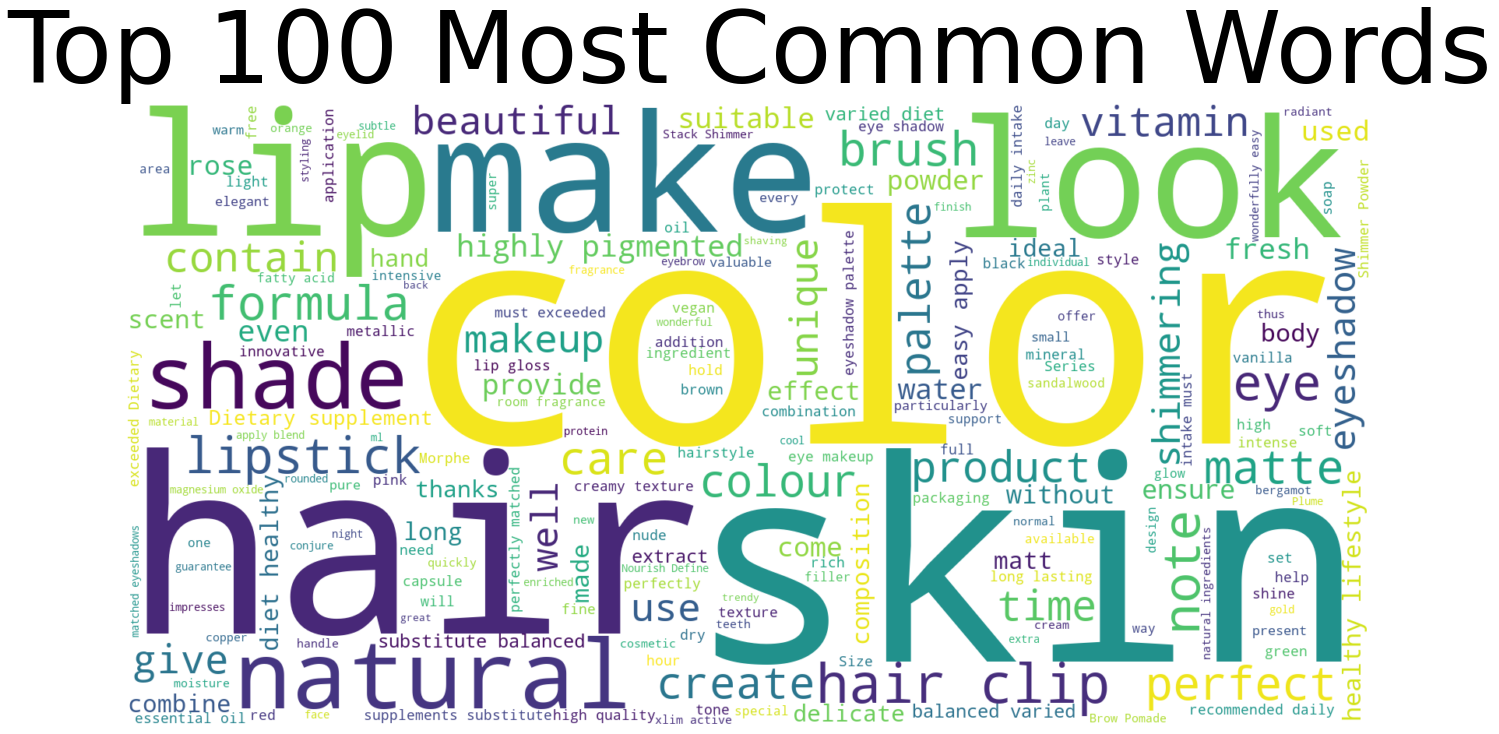

In [ ]:
mostcommon = FreqDist(allwords).most_common(300)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [ ]:
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)


df['description_norm']=df['description_norm'].apply(lambda x:expand_contractions(x))

In [ ]:
df["description_norm"] = df["description_norm"].str.lower()
df.head()

title_norm  ... desc_len
0                                          004  ...      451
2                                  0.15mm C 13  ...      491
3                                 01 Day Cream  ...      437
4  01 Day Cream SPF 30 - day cream with SPF 30  ...      548
5                              01 Kabuki brush  ...      643

[5 rows x 8 columns]

Removal of Punctuations 

One another common text preprocessing technique is to remove the punctuations from the text data. This is again a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

We also need to carefully choose the list of punctuations to exclude depending on the use case. For example, the string.punctuation in python contains the following punctuation symbols

!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

We can add or remove more punctuations as per our nee

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["desc_wo_punct"] = df["description_norm"].apply(lambda text: remove_punctuation(text))
df.head()

title_norm  ...                                      desc_wo_punct
0                                          004  ...  refreshing citrus fragrance with sophisticated...
2                                  0.15mm C 13  ...  lash extensions in classic designlavertu is ey...
3                                 01 Day Cream  ...  the day cream is enriched with effective ingre...
4  01 Day Cream SPF 30 - day cream with SPF 30  ...  this lightweight yet velvety hydrating 01 day ...
5                              01 Kabuki brush  ...  for stunning makeup lookthe kabuki brush from ...

[5 rows x 9 columns]

Removal of stopwords

Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.

These stopword lists are already compiled for different languages and we can safely use them. For example, the stopword list for english language from the nltk package can be seen below.

In [ ]:
stopwords_set= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["desc_wo_stop"] = df["desc_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

title_norm  ...                                       desc_wo_stop
0                                          004  ...  refreshing citrus fragrance sophisticated spic...
2                                  0.15mm C 13  ...  lash extensions classic designlavertu eyelash ...
3                                 01 Day Cream  ...  day cream enriched effective ingredients kigel...
4  01 Day Cream SPF 30 - day cream with SPF 30  ...  lightweight yet velvety hydrating 01 day cream...
5                              01 Kabuki brush  ...  stunning makeup lookthe kabuki brush miild hel...

[5 rows x 10 columns]

Removal of Frequent words

In the previos preprocessing step, we removed the stopwords based on language information. But say, if we have a domain specific corpus, we might also have some frequent words which are of not so much importance to us.

So this step is to remove the frequent words in the given corpus. If we use something like tfidf, this is automatically taken care of.

Let us get the most common words adn then remove them in the next step

In [ ]:
from collections import Counter
cnt = Counter()
for text in df["desc_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('skin', 71269),
 ('hair', 42921),
 ('care', 26501),
 ('oil', 21281),
 ('natural', 20002),
 ('also', 18837),
 ('formula', 17500),
 ('ingredients', 15385),
 ('—', 13075),
 ('cream', 12189)]

Removal of Rare words

This is very similar to previous preprocessing step but we will remove the rare words from the corpus

In [ ]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["desc_wo_rare"] = df["desc_wo_stop"].apply(lambda text: remove_rarewords(text))
df.head()

title_norm  ...                                     desc_lemmatize
0                                          004  ...  refresh citrus fragrance sophisticate spicines...
2                                  0.15mm C 13  ...  lash extension classic designlavertu eyelash e...
3                                 01 Day Cream  ...  day cream enrich effective ingredient kigelia ...
4  01 Day Cream SPF 30 - day cream with SPF 30  ...  lightweight yet velvety hydrate 01 day cream k...
5                              01 Kabuki brush  ...  stun makeup lookthe kabuki brush miild help cr...

[5 rows x 12 columns]

Lemmatization¶

Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.

As a result, this one is generally slower than stemming process. So depending on the speed requirement, we can choose to use either stemming or lemmatization.

Let us use the WordNetLemmatizer in nltk to lemmatize our sentences

In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["desc_lemmatize"] = df["desc_wo_rare"].apply(lambda text: lemmatize_words(text))
df.head()

title_norm  ...                                     desc_lemmatize
0                                          004  ...  refresh citrus fragrance sophisticate spicines...
2                                  0.15mm C 13  ...  lash extension classic designlavertu eyelash e...
3                                 01 Day Cream  ...  day cream enrich effective ingredient kigelia ...
4  01 Day Cream SPF 30 - day cream with SPF 30  ...  lightweight yet velvety hydrate 01 day cream k...
5                              01 Kabuki brush  ...  stun makeup lookthe kabuki brush miild help cr...

[5 rows x 12 columns]

Removal of URLs

Next preprocessing step is to remove any URLs present in the data. For example, if we are doing a twitter analysis, then there is a good chance that the tweet will have some URL in it. Probably we might need to remove them for our further analysis.

We can use the below code snippet to do that.

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    url_text= url_pattern.sub(r'', text)
    return(BeautifulSoup(url_text, "lxml").text)
df["desc_ro_url"] = df["desc_lemmatize"].apply(lambda text: remove_urls(text))
df.head()    

title_norm  ...                                        desc_ro_url
0                                          004  ...  refresh citrus fragrance sophisticate spicines...
2                                  0.15mm C 13  ...  lash extension classic designlavertu eyelash e...
3                                 01 Day Cream  ...  day cream enrich effective ingredient kigelia ...
4  01 Day Cream SPF 30 - day cream with SPF 30  ...  lightweight yet velvety hydrate 01 day cream k...
5                              01 Kabuki brush  ...  stun makeup lookthe kabuki brush miild help cr...

[5 rows x 13 columns]

Chat Words Conversion

This is an important text preprocessing step if we are dealing with chat data. People do use a lot of abbreviated words in chat and so it might be helpful to expand those words for our analysis purposes.

Got a good list of chat slang words from this repo. We can use this for our conversion here. We can add more words to this lis

In [ ]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [ ]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

In [ ]:
def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)
    

In [ ]:
df["desc_ro_chatword"] = df["desc_ro_url"].apply(lambda text: chat_words_conversion(text))
df.head()  

title_norm  ...                                   desc_ro_chatword
0                                          004  ...  refresh citrus fragrance sophisticate spicines...
2                                  0.15mm C 13  ...  lash extension classic designlavertu eyelash e...
3                                 01 Day Cream  ...  day cream enrich effective ingredient kigelia ...
4  01 Day Cream SPF 30 - day cream with SPF 30  ...  lightweight yet velvety hydrate 01 day cream k...
5                              01 Kabuki brush  ...  stun makeup lookthe kabuki brush miild help cr...

[5 rows x 14 columns]

Removal of Emoticons


This is what we did in the last step right? Nope. We did remove emojis in the last step but not emoticons. There is a minor difference between emojis and emoticons.

From Grammarist.com, emoticon is built from keyboard characters that when put together in a certain way represent a facial expression, an emoji is an actual image.

:-) is an emoticon

😀 is an emoji

Thanks to NeelShah for the wonderful collection of emoticons, we are going to use them to remove emoticons.

Please note again that the removal of emojis / emoticons are not always preferred and decision should be made based on the use case at hand.

In [ ]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [ ]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

df["desc_cov_emo"] = df["desc_ro_chatword"].apply(lambda text: convert_emoticons(text))
df.head()  


title_norm  ...                                       desc_cov_emo
0                                          004  ...  refresh citrus fragrance sophisticate spicines...
2                                  0.15mm C 13  ...  lash extension classic designlavertu eyelash e...
3                                 01 Day Cream  ...  day cream enrich effective ingredient kigelia ...
4  01 Day Cream SPF 30 - day cream with SPF 30  ...  lightweight yet velvety hydrate 01 day cream k...
5                              01 Kabuki brush  ...  stun makeup lookthe kabuki brush miild help cr...

[5 rows x 15 columns]

In [ ]:
df =df.drop(labels=['desc_wo_punct','desc_wo_stop','desc_wo_rare','desc_lemmatize','desc_ro_url','desc_ro_chatword'], axis=1)

In [ ]:
df.head()  

title_norm  ...                                       desc_cov_emo
0                                          004  ...  refresh citrus fragrance sophisticate spicines...
2                                  0.15mm C 13  ...  lash extension classic designlavertu eyelash e...
3                                 01 Day Cream  ...  day cream enrich effective ingredient kigelia ...
4  01 Day Cream SPF 30 - day cream with SPF 30  ...  lightweight yet velvety hydrate 01 day cream k...
5                              01 Kabuki brush  ...  stun makeup lookthe kabuki brush miild help cr...

[5 rows x 9 columns]

In [ ]:
df.to_csv('df_category.csv', index=False) 

In [ ]:
df_1=pd.read_csv('df_category.csv')

In [ ]:
df_1.head(2)

title_norm  ...                                       desc_cov_emo
0          004  ...  refresh citrus fragrance sophisticate spicines...
1  0.15mm C 13  ...  lash extension classic designlavertu eyelash e...

[2 rows x 9 columns]

In [ ]:
print(df_1['cat_idealo'].value_counts())

Drugstore & Health > Body Hygiene & Care > Facial care                                         11218
Drugstore & Health > Body Hygiene & Care > Hair Care & Styling > Hair care products             4507
Drugstore & Health > Medicine & Nutritional Supplements > Food supplements                      2993
Drugstore & Health > Body Hygiene & Care > Body care                                            2104
Drugstore & Health > Cosmetics & Fragrances > Fragrances > Women's fragrances                   2010
                                                                                               ...  
Drugstore & Health > Love & Contraception > Condoms                                               32
Drugstore & Health > Cosmetics & Fragrances > Make-up > Eyebrows & Eyelashes > Eyelash glue       32
Drugstore & Health > Love & Contraception > Vibrators                                             31
Drugstore & Health > Cosmetics & Fragrances > Make-up > Complexion > Camouflage make-up    

In [ ]:
id_to_category = pd.Series(df_1.cat_idealo.value_counts()).to_dict()
id_to_category

{'Drugstore & Health > Baby care products > Baby care': 123,
 'Drugstore & Health > Body Hygiene & Care > Body care': 2104,
 'Drugstore & Health > Body Hygiene & Care > Dental care': 730,
 'Drugstore & Health > Body Hygiene & Care > Deodorants': 565,
 'Drugstore & Health > Body Hygiene & Care > Facial care': 11218,
 'Drugstore & Health > Body Hygiene & Care > Feminine hygiene': 108,
 'Drugstore & Health > Body Hygiene & Care > Foot care': 312,
 'Drugstore & Health > Body Hygiene & Care > Hair Care & Styling > Hair care products': 4507,
 'Drugstore & Health > Body Hygiene & Care > Hair Care & Styling > Hair colors': 404,
 'Drugstore & Health > Body Hygiene & Care > Hair Care & Styling > Hair styling products': 1599,
 'Drugstore & Health > Body Hygiene & Care > Hair Care & Styling > Hairbrushes': 367,
 'Drugstore & Health > Body Hygiene & Care > Hair Care & Styling > Hairdressing supplies': 634,
 'Drugstore & Health > Body Hygiene & Care > Hand care': 808,
 'Drugstore & Health > Body Hyg

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_1['cat_label']=le.fit_transform(df_1['cat_idealo'])

In [ ]:
import nlpaug.augmenter.word.context_word_embs as aug
augmenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm
label_good=[]
label_bad=[]
augment_text_old=[]
augment_text_new=[]
#i=1
for idx,label in tqdm(enumerate(df_1['cat_label'].value_counts().index.tolist())):
    Counts = df_1['cat_label'].value_counts()[idx]
    if(Counts<150):
      df_sample=df_1[df_1['cat_label']==label]
      for i in df_sample.index:
          text_w=df_sample['desc_cov_emo'][i]
          for j in range(5):
             augment_text_new.append(augmenter.augment(str(text_w)))
             label_bad.append(label)
    else:
        label_good.append(label)
        df_old=df_1[df_1['cat_label']==label]
        df_total.append(df_old)

0it [00:00, ?it/s]

In [ ]:
for i in df_sample.index:
    print(df_sample['desc_cov_emo'][i])
    print('*'*20)
   

   

Streaming output truncated to the last 5000 lines.
revolutionary antiaging night cream take awake best skin life — also next trip thanks superpractical travel size charlotte tilbury magic night cream relies innovative active ingredient youthful radiant complexion skin feel firmer clinically test wonderful formula allow skin gain firmness continuous use increase elasticity 36 eight week make revolutionary night moisturizer wonderful stem cell extract daphne dualaction retinol red algae marigel rejuvenate improve protects skin bionymph peptide complex contain reduces appearance wrinkle allow skin gain elasticity olus castor oil provide skin intensive moisture make velvety soft ideal formula night reduces sign age give youthful appearance supple radiant complexion
********************
magic trio glow skinwith charlotte magic skincare wardrobe perfect trio charlotte tilbury come practical travel size magical skincare ritual magic serum crystal elixir help correct skin problem reduce appear

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



********************
revitalize cleanse cream gel texturethe cleanse gel revitalize cleanse augustine bader base revolutionary tfc8® technology design daily use luxurious formula remove dirt impurity makeup without irritate dehydrate skin instead nonfoaming creamgel texture hydrate skin help retain moisture gain even longer support natural regeneration process help unify skin tone smooth skin texture cleanse gel also help reduce redness soothes stress skin refines pore promotes skin elasticity excellently prepare subsequent care less product “clean beauty” category therefore free certain ingredient whose harmlessness fully understood find information clean beauty guide
********************
cleanse gel combine magnetize tourmaline la mer exclusive deconstruct water nutrientrich miracle broth heart la m amaze power cleanse gel gently remove excess sebum impurity debris skin without irritate dry ideal oily combination skin need
********************
cleanse lotion la mer cleanse skin face 